In [5]:
import mne
print('MNE Version:', mne.__version__)

import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Qt5Agg')
%matplotlib qt5

%load_ext autoreload
%autoreload 2
import WU_MEG_DP

MNE Version: 1.0.0
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
Settings = {}

# Directory to read file for analysis.
# inDataDir = "E:\Work\PostDoc\Data\Sample Data\Long\\MEG_Data_20210805_Stage1"
# Settings["inDataDir"] = "E:\Work\PostDoc\Data\Sample Data\Long\\MEG_Data_20210805_Stage2_EMD"
Settings["inDataDir"] = "E:\Work\PostDoc\Data\Sample Data\Long\\MEG_Data_20210805_PGA"

# File name to analyze.
# Settings["DataFileNames"] = ["sub1004_Stage2_EMD.pkl"]
Settings["DataFileNames"] = ["sub1006_PGA.pkl"]

In [7]:
# Controls
timeRangeList = [(-200, 200), (-200, 800), (0, 800), (0, 400)]
# timeRangeList = [(5800, 6200), (6000, 6800)]
# Selection of time segments to prepare
baselineList = [(-200, 0), (-200, -0), (0, 0), (0, 200)]
# baselineList = [(5800, 6000), (5800, 6000)]
# Selection of baselines for the segments to prepare

segNum = 3
# Which segment to plot.

type = 'flip'
# Parameter type has two options: 'base' and 'flip' and which define what data to load. All the recorded epochs or the flipped epochs.
dedication = 'train'
# Parameter dedication selects 'all', 'train' or 'test' subset.
newTDT = 'unknown'

In [8]:
# Load project library.
sl = WU_MEG_DP.Sumitomo_Decoding_Long(Settings, loadSettings='yes')

Script by Dmitry Patashov
WU Script Version: 3.6.1



In [9]:
# Load Data
segment_manager = sl.LoadSegmentData(Settings["DataFileNames"][0], Settings["inDataDir"])

                                                Settings
subject                                             1006
badChannels                                     [18, 21]
numberOfChannels                                      64
eventChannels                           (64, 65, 66, 67)
fullDump                                              no
RawDataFiltration                                    yes
cutoff_l                                             0.1
cutoff_h                                              40
DT                                                  auto
DT_param                                            None
epochTypes                [010, 011, 100, 101, 110, 111]
resemple                                             yes
new_freq                                             500
tmin                                                -0.2
tmax                                                 0.8
baseline                                       (-0.2, 0)
min_event_duration             

In [10]:
if segment_manager.GetTDT() == 'All(PGA)':
    segment_manager.ResetTDT(newTDT)

In [11]:
eventLog = segment_manager.epochs_manager['log']
# Print current logfile
eventLog.printLog()

                        STIM3 STIM2 STIM1 MNE-All MNE-Valid WU-All Using  \
Set 1 - Empty (None)        0     0     1       2         1      0     0   
Set 2 - Image1 (Sushi)      0     1     0      53        50     50    46   
Set 3 - Image2 (Gyoza)      0     1     1      50        49     50    44   
Set 4 - Image3 (Cookie)     1     0     0      51        50     50    46   
Set 5 - Image5 (Knife)      1     0     1      51        51     49    45   
Set 6 - Image4 (Kushi)      1     1     0      49        49     49    44   
Set 7 - Image6 (Pencil)     1     1     1      49        49     51    45   

                         Train  Test  
Set 1 - Empty (None)         0     0  
Set 2 - Image1 (Sushi)      99    99  
Set 3 - Image2 (Gyoza)      99    99  
Set 4 - Image3 (Cookie)     99    99  
Set 5 - Image5 (Knife)      99    99  
Set 6 - Image4 (Kushi)      99    99  
Set 7 - Image6 (Pencil)     99    99  


In [12]:
# <<<<<<< ------- Example of how to get the train and test datasets ------- >>>>>>> #
print('Number of segments: ', segment_manager.numberOfSegments, ' ', end="")
segment_manager.PrintSegments() # Prints segment ranges in ms.

segment_manager.AddSegments(timeRangeList, baselineList) # Adds requested segments

print('\nNumber of segments: ', segment_manager.numberOfSegments, ' ', end="")
segment_manager.PrintSegments()
dataSegment0_200 = segment_manager.dataSegmentList[0] # Get first segment. [1]/[2]/[3]... will get the 2nd, 3rd and so on.
# dataSegment has the following fields:
# 'time' - Full time vector
# 'stamps' - Indices of respective segment border values
# 'range' - Segment border values
# 'baseline' - Base line that is not included in the analysis
# 'MLready' - Can be either 'yes' or 'no', referring to, if the 'train' and 'test' data is prepared.
# And event type field (e.g. '010', '111'), which has 4 subfields: 'base', 'flip', 'train' and 'test'.

trData = dataSegment0_200['010']['train'] # Extract train data for event 010
teData = dataSegment0_200['010']['test'] # Extract test data for event 010
print("\nTrain data size 010: 0-200ms" ,trData.shape)
print("Test data size 010: 0-200ms" ,teData.shape)

# segment_manager.RemoveSegment(timeRangeList[2]) # Removes requested segments
# print('\nNumber of segments: ', segment_manager.numberOfSegments, ' ', end="")
# segment_manager.PrintSegments()

Number of segments:  0  []

Number of segments:  4  [(-200, 200), (-200, 800), (0, 800), (0, 400)]

Train data size 010: 0-200ms (99, 64, 200)
Test data size 010: 0-200ms (99, 64, 200)


In [13]:
combinationsSet = segment_manager.combinationsSet

In [14]:
timeRange = timeRangeList[segNum]
# Segment range
baseline = baselineList[segNum]
# Baseline for the plotted segment.

# If for any reason you would like to extract a specific segment and work with it in epochs manager, following command will perform the conversion.
epochs_manager = sl.Segment2Epoch_manager(segment_manager, timeRange, type, baseline)

Not setting metadata
99 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
0 bad epochs dropped
Not setting metadata
99 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
0 bad epochs dropped
Not setting metadata
46 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
0 bad epochs dropped
Not setting metadata
99 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
0 bad epochs dropped
Not setting metadata
99 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
0 bad epochs dropped
Not setting metadata
44 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
0 bad epochs dropped
Not setting metadata
99 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
0 bad epochs dropped
Not setting metadata
99 matching e

In [15]:
# Calculate grand-average.
# evoked_conditions = sl.PrepareEnvokedConditions(epochs_manager, eventLog)
evoked_conditions = sl.PrepareEnvokedConditions(epochs_manager, eventLog, dedication=dedication)

# evoked_conditions = sl.PrepareEnvokedConditions(epochs_manager, eventLog, type='base', dedication='train')
# Two additional parameters are non-mondatory. The function may be used as:
# evoked_conditions = sl.PrepareEnvokedConditions(epochs_manager, eventLog)
# Parameter type has two options: 'base' and 'pga' which define what data to load. All the raw epochs or the PGA averaged ones.
# Parameter dedication selects 'train' or 'test' subset if 'pga' option was selected for type.
# The function returns:
# evoked_conditions - Dictionary containing evoked conditions for all the datasets.
# To access the specific dataset use: evoked_conditions['111']. This example will access dataset number 7.

In [16]:
# Constant Definitions
ts_args = dict(gfp=False, time_unit='ms')
topomap_args = dict(sensors=True, time_unit='ms')
# plt_times = np.array([0.2,0.4,0.6])
plt_times = 'auto'

No projector specified for this dataset. Please consider the method self.add_proj.


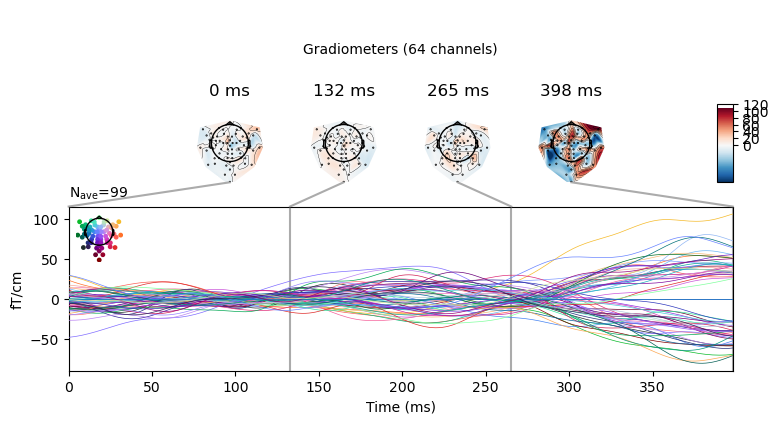

In [17]:
evoked_conditions['010'].plot_joint(times=plt_times, ts_args=ts_args, topomap_args=topomap_args)

No projector specified for this dataset. Please consider the method self.add_proj.


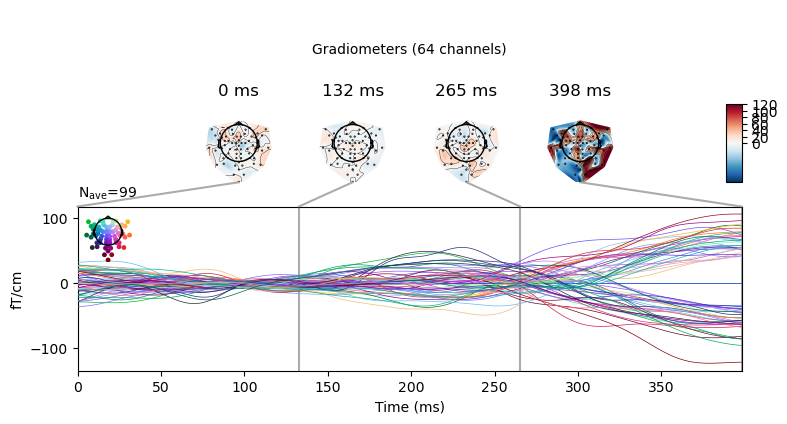

In [18]:
fig = plt.gcf()
plt.close(fig)
evoked_conditions['011'].plot_joint(times=plt_times, ts_args=ts_args, topomap_args=topomap_args)

No projector specified for this dataset. Please consider the method self.add_proj.


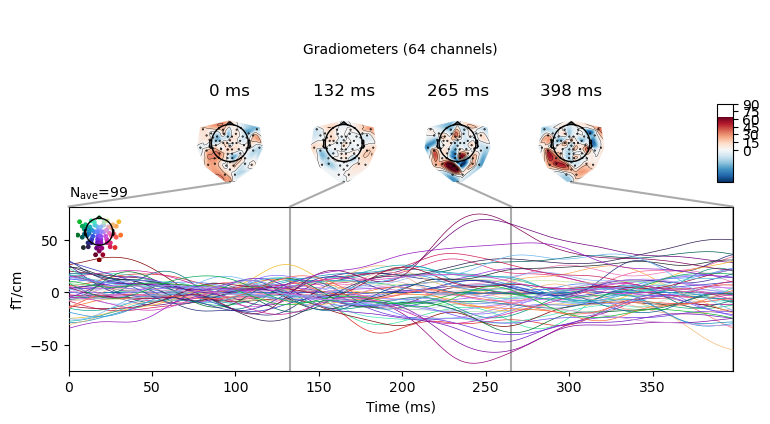

In [19]:
fig = plt.gcf()
plt.close(fig)
evoked_conditions['100'].plot_joint(times=plt_times, ts_args=ts_args, topomap_args=topomap_args)

No projector specified for this dataset. Please consider the method self.add_proj.


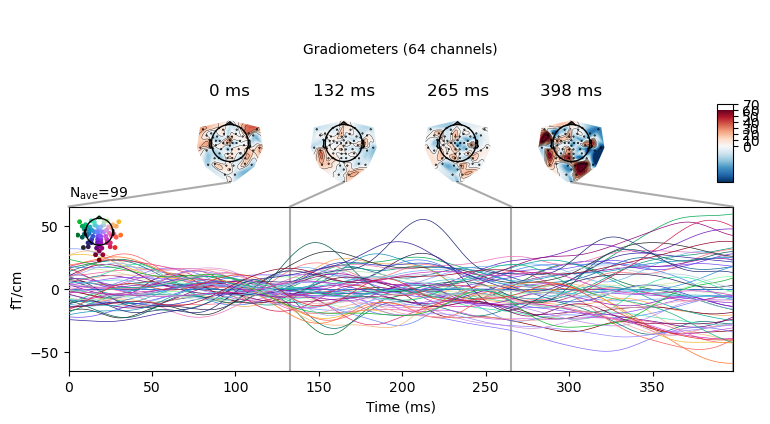

In [20]:
fig = plt.gcf()
plt.close(fig)
evoked_conditions['101'].plot_joint(times=plt_times, ts_args=ts_args, topomap_args=topomap_args)

No projector specified for this dataset. Please consider the method self.add_proj.


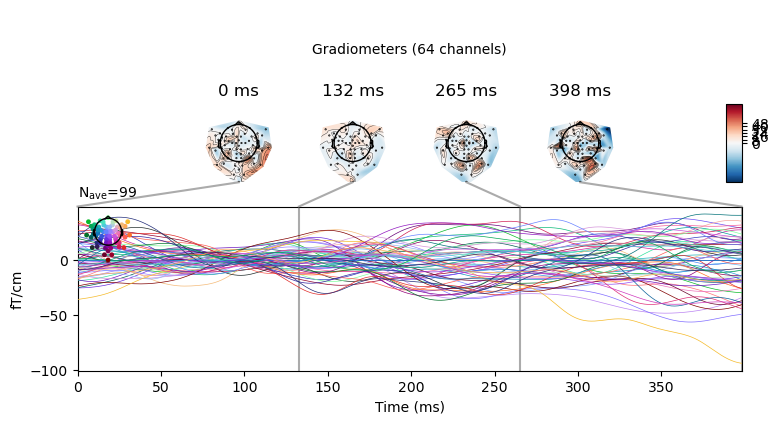

In [21]:
fig = plt.gcf()
plt.close(fig)
evoked_conditions['110'].plot_joint(times=plt_times, ts_args=ts_args, topomap_args=topomap_args)

No projector specified for this dataset. Please consider the method self.add_proj.


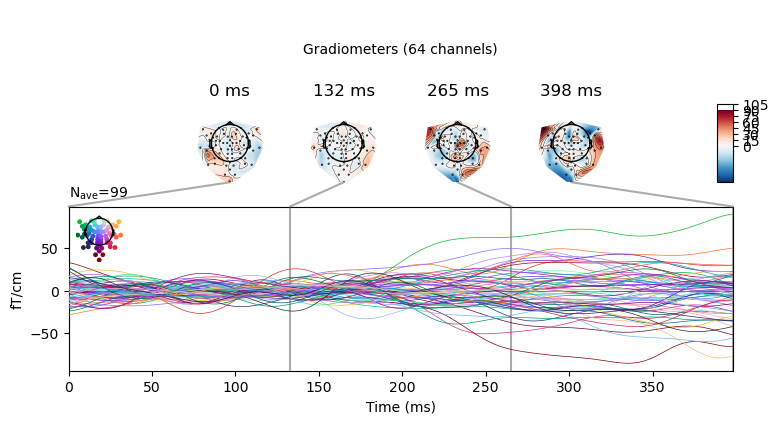

In [22]:
fig = plt.gcf()
plt.close(fig)
evoked_conditions['111'].plot_joint(times=plt_times, ts_args=ts_args, topomap_args=topomap_args)

In [23]:
fig = plt.gcf()
plt.close(fig)

In [24]:
plt.figure()
plt.rcParams['font.size'] = 13

ax1 = plt.subplot(321)
evoked_conditions['010'].plot(axes=ax1, spatial_colors=True, time_unit='ms')
ax1.grid(axis='x')
plt.title('Sushi')

ax2 = plt.subplot(325, sharex=ax1, sharey=ax1)
evoked_conditions['011'].plot(axes=ax2, spatial_colors=True, time_unit='ms')
ax2.grid(axis='x')
plt.title('Gyoza')

ax3 = plt.subplot(323, sharex=ax1, sharey=ax1)
evoked_conditions['100'].plot(axes=ax3, spatial_colors=True, time_unit='ms')
ax3.grid(axis='x')
plt.title('Cookie')

ax4 = plt.subplot(324, sharex=ax1, sharey=ax1)
evoked_conditions['101'].plot(axes=ax4, spatial_colors=True, time_unit='ms')
ax4.grid(axis='x')
plt.title('Knife')

ax4 = plt.subplot(322, sharex=ax1, sharey=ax1)
evoked_conditions['110'].plot(axes=ax4, spatial_colors=True, time_unit='ms')
ax4.grid(axis='x')
plt.title('Brush')

ax4 = plt.subplot(326, sharex=ax1, sharey=ax1)
evoked_conditions['111'].plot(axes=ax4, spatial_colors=True, time_unit='ms')
ax4.grid(axis='x')
plt.title('Pencil')

plt.show()